In [1]:
import traceback
from pathlib import Path

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize

import xarray as xr

import earthcarekit as eck


In [2]:
oaf = "09182F"
oaf = "09183F" # maybe better, has more precip


df = eck.search_product(
    orbit_and_frame=oaf,
    file_type='ATL_TC__2A'
)
print("- Results using 'orbit_and_frame':", df.name)

- Results using 'orbit_and_frame': ['ECA_EXBC_ATL_TC__2A_20260109T034453Z_20260109T050437Z_09183F']


In [3]:
with eck.read_product(df.filepath[-1]) as ds:
    ds_short = eck.filter_latitude(ds=ds, lat_range=[-50, -35])

In [4]:
ds

<xarray.Dataset> Size: 59MB
Dimensions:                                                 (along_track: 4964,
                                                             vertical: 242,
                                                             class: 7)
Dimensions without coordinates: along_track, vertical, class
Data variables: (12/36)
    filename                                                <U60 240B ...
    file_type                                               <U10 40B ...
    frame_id                                                <U1 4B 'F'
    orbit_number                                            uint32 4B 9183
    orbit_and_frame                                         <U6 24B '09183F'
    baseline                                                <U2 8B 'BC'
    ...                                                      ...
    classification                                          (along_track, vertical) int8 1MB ...
    classification_medium_resolution                        (along_track, vertical) int8 1MB ...
    classification_low_resolution                           (along_track, vertical) int8 1MB ...
    temperature                                             (along_track, vertical) float32 5MB ...
    pressure                                                (along_track, vertical) float32 5MB ...
    relative_humidity                                       (along_track, vertical) float32 5MB ...

In [5]:
print(list(ds_short.keys()))

['filename', 'file_type', 'frame_id', 'orbit_number', 'orbit_and_frame', 'baseline', 'sensing_start_time', 'processing_start_time', 'trim_index_offset', 'medium_resolution_number_of_joint_standard_grid_pixels', 'low_resolution_number_of_joint_standard_grid_pixels', 'joint_standard_grid_index', 'latitude', 'longitude', 'time', 'height', 'range', 'viewing_elevation_angle', 'elevation', 'tropopause_height', 'geoid_offset', 'simple_classification', 'mie_detection_status', 'rayleigh_detection_status', 'extended_data_quality_status', 'quality_status', 'aerosol_classes', 'aerosol_classification_prob', 'aerosol_classification_prob_medium_resolution', 'aerosol_classification_prob_low_resolution', 'classification', 'classification_medium_resolution', 'classification_low_resolution', 'temperature', 'pressure', 'relative_humidity']


simple_classification
mie_detection_status
rayleigh_detection_status
extended_data_quality_status
quality_status
classification
classification_medium_resolution
classification_low_resolution


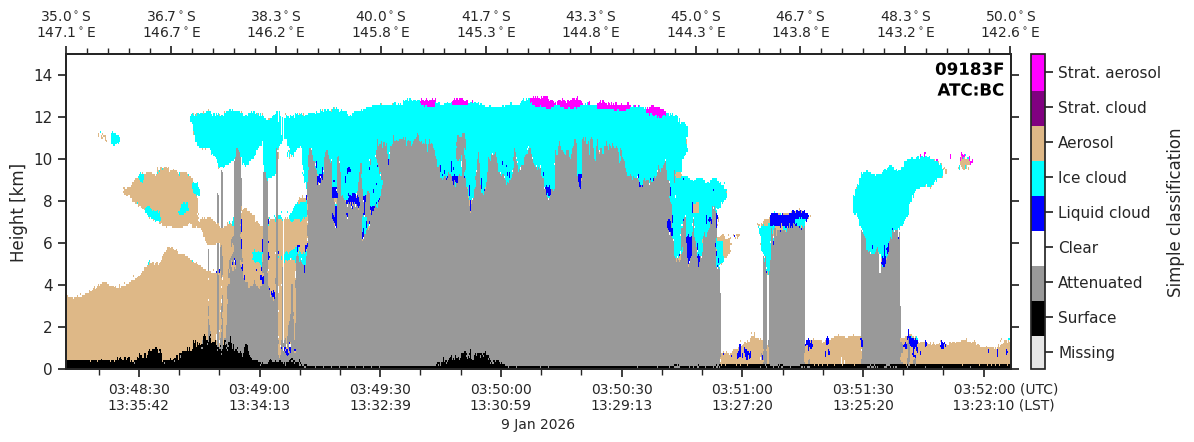

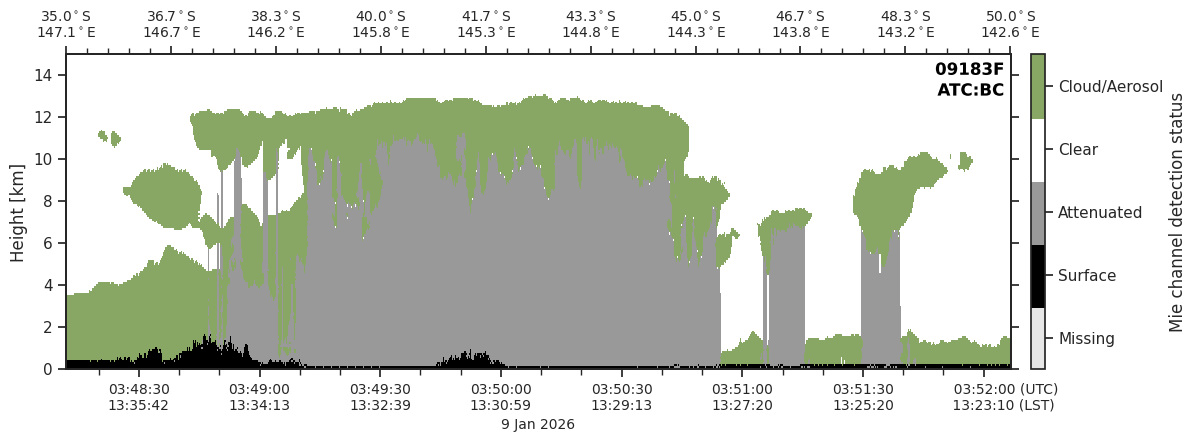

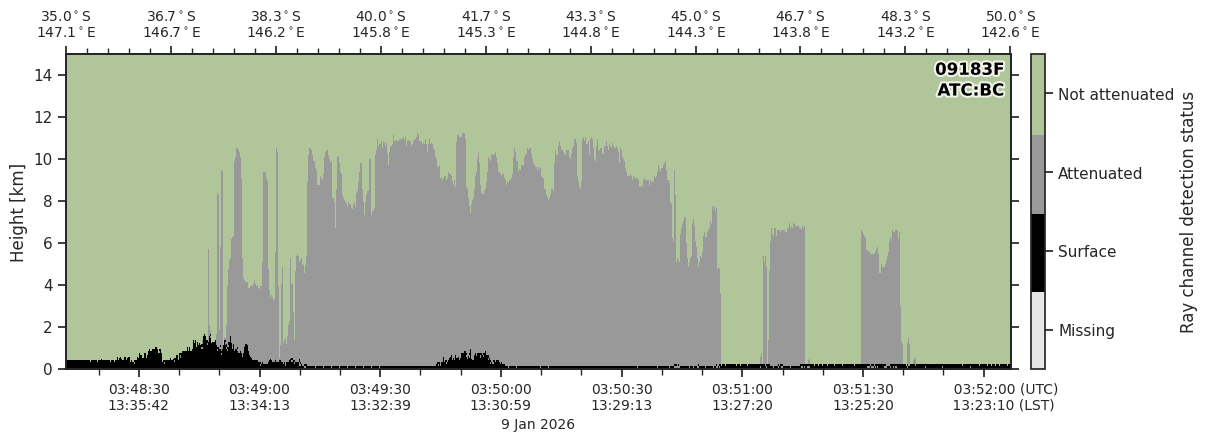

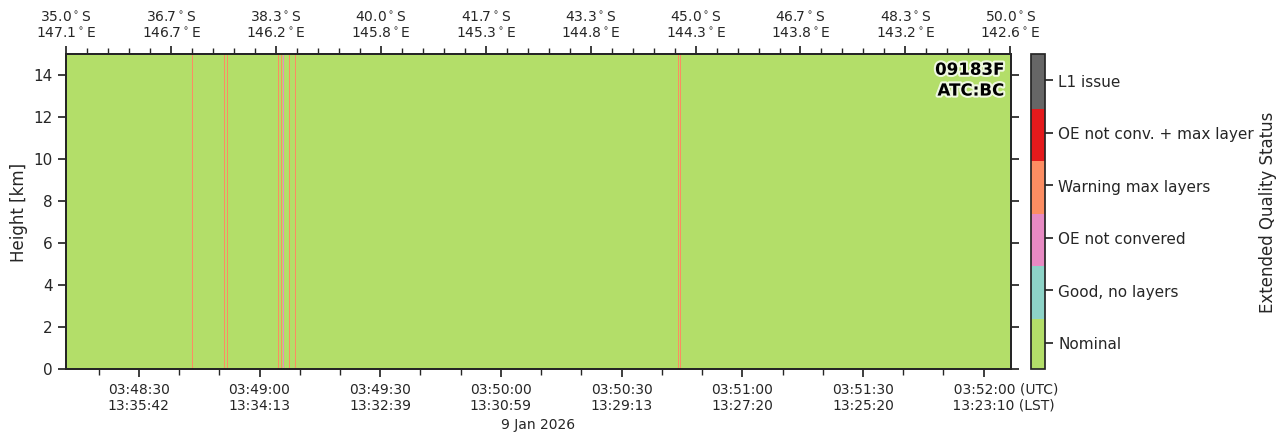

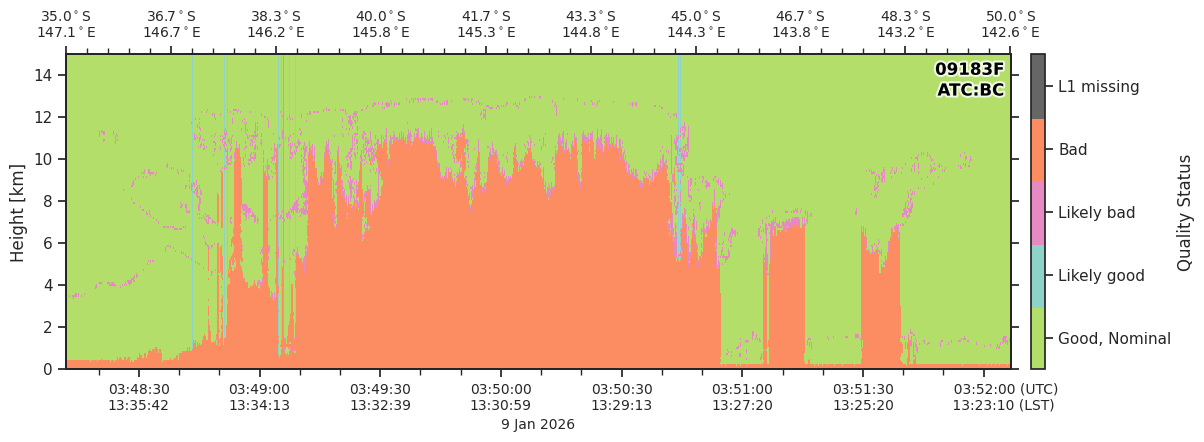

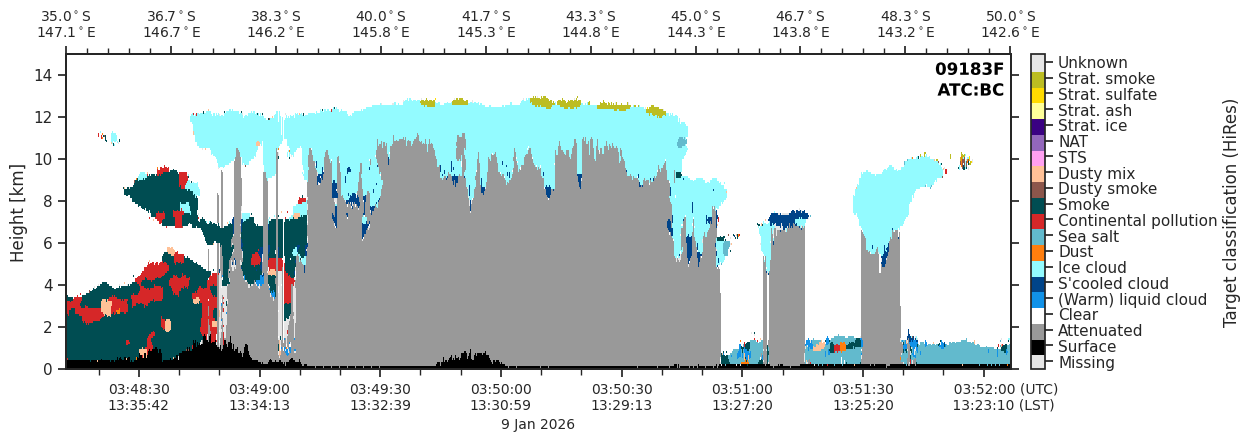

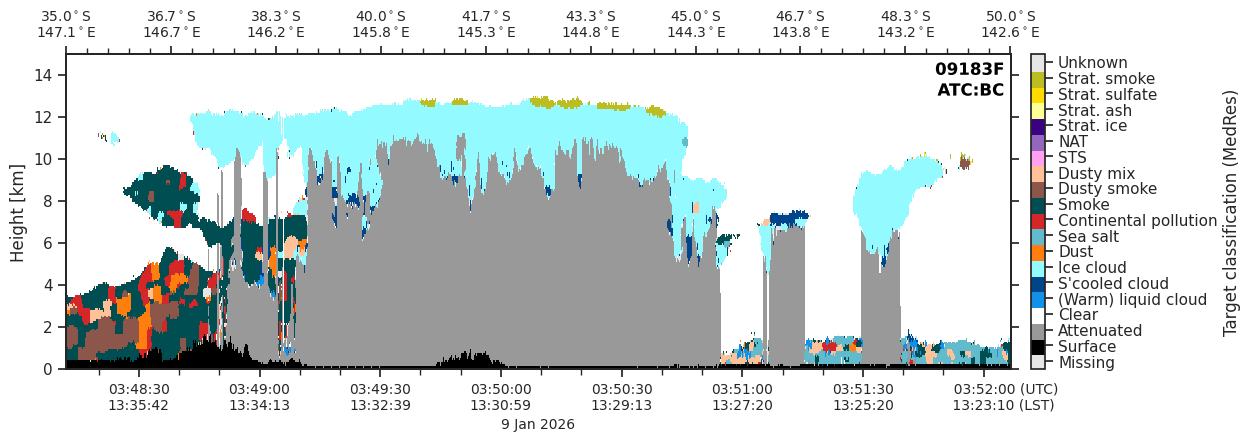

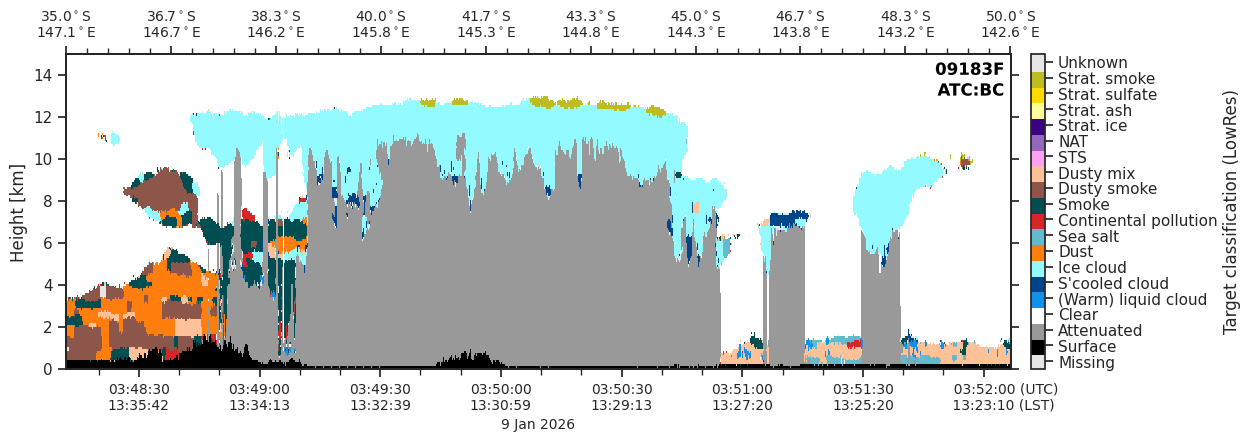

In [6]:
var_to_plot = [
    'simple_classification', 'mie_detection_status', 
    'rayleigh_detection_status', 'extended_data_quality_status', 
    'quality_status', 
    'classification', 'classification_medium_resolution', 'classification_low_resolution', 
    ]


for varname in var_to_plot:
    print(varname)
    cfig = eck.CurtainFigure()
    cfig = cfig.ecplot(
        ds_short,
        var=varname,
        height_range=(0, 15e3),  # Show only data within 20km height
    )

### Monkey-patch colormaps

In [7]:
eck.plot.color.colormap.atl_simple_classification.cmap_data

[[-3, '#E6E6E6', 'Missing'],
 [-2, '#000000', 'Surface'],
 [-1, '#999999', 'Attenuated'],
 [0, '#FFFFFF', 'Clear'],
 [1, '#0000FF', 'Liquid cloud'],
 [2, '#00FFFF', 'Ice cloud'],
 [3, '#DEB887', 'Aerosol'],
 [4, '#800080', 'Strat. cloud'],
 [5, '#FF00FF', 'Strat. aerosol']]

In [8]:

eck.plot.color.colormap.atl_simple_classification.cmap_data[-3] = (3, '#FF0000', 'A.')

In [9]:

eck.plot.color.colormap.atl_simple_classification.cmap_data

[[-3, '#E6E6E6', 'Missing'],
 [-2, '#000000', 'Surface'],
 [-1, '#999999', 'Attenuated'],
 [0, '#FFFFFF', 'Clear'],
 [1, '#0000FF', 'Liquid cloud'],
 [2, '#00FFFF', 'Ice cloud'],
 (3, '#FF0000', 'A.'),
 [4, '#800080', 'Strat. cloud'],
 [5, '#FF00FF', 'Strat. aerosol']]

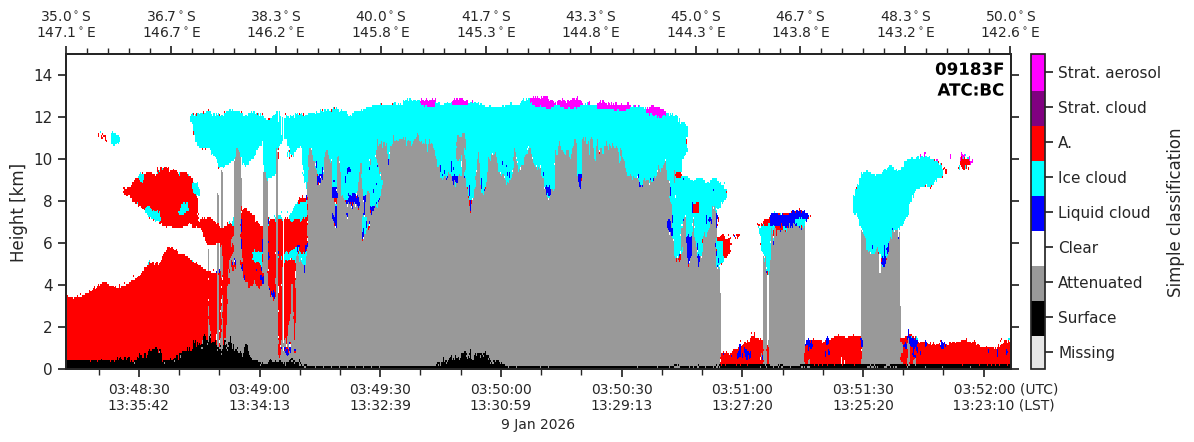

In [10]:

cfig = eck.CurtainFigure()
cfig = cfig.ecplot(
    ds_short,
    var='simple_classification',
    height_range=(0, 15e3),  
)

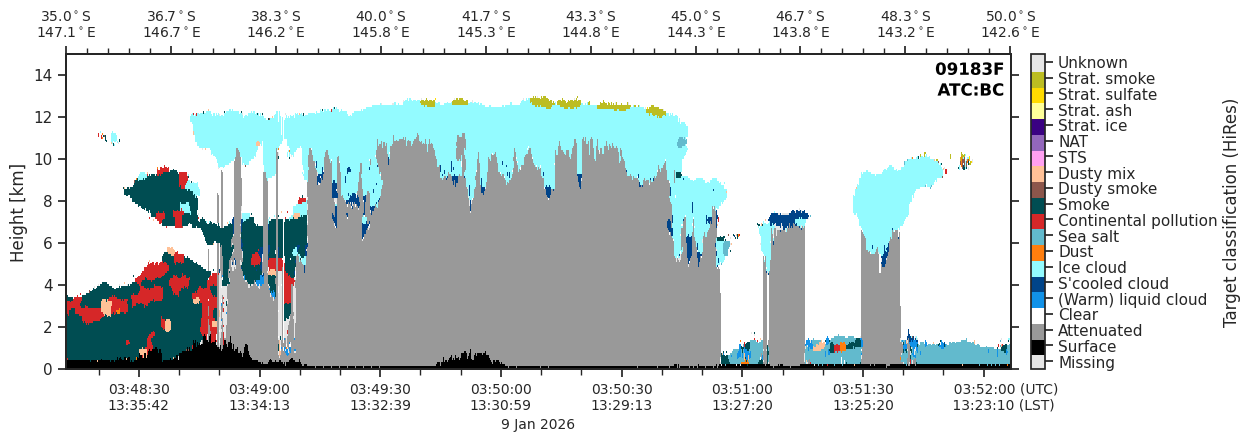

In [11]:

cfig = eck.CurtainFigure()
cfig = cfig.ecplot(
    ds_short,
    var='classification',
    height_range=(0, 15e3),  
)

In [12]:

eck.plot.color.colormap.atl_target_classification.cmap_data = \
    eck.plot.color.colormap.atl_target_classification.cmap_data[:-1] + [
    (101, "#dec29dff", 'Unknown: Aerosol Target has a very low probability'),
    (102, "#a4855c", 'Unknown: Aerosol class outside of param space'),
    (104, "#ffdcff", 'Unknown: Strat. Aerosol Target has a very low probability'),
    (105, "#ffdcff", 'Unknown: Strat. Aerosol class outside of param space'),
    (106, "#765D76", 'Unknown: PSC Target has a very low probability'),
    (107, "#765D76", 'Unknown: PSC classification outside of param space'),
    ]

In [13]:

eck.plot.color.colormap.atl_target_classification.cmap_data

[[-3, '#E6E6E6', 'Missing'],
 [-2, '#000000', 'Surface'],
 [-1, '#999999', 'Attenuated'],
 [0, '#FFFFFF', 'Clear'],
 [1, '#1192E8', '(Warm) liquid cloud'],
 [2, '#004489', "S'cooled cloud"],
 [3, '#93FBFF', 'Ice cloud'],
 [10, '#FF7E0E', 'Dust'],
 [11, '#62BACD', 'Sea salt'],
 [12, '#D62728', 'Continental pollution'],
 [13, '#004D52', 'Smoke'],
 [14, '#8C564B', 'Dusty smoke'],
 [15, '#FFC197', 'Dusty mix'],
 [20, '#FFA0F1', 'STS'],
 [21, '#9367BC', 'NAT'],
 [22, '#3A0182', 'Strat. ice'],
 [25, '#FFFF9A', 'Strat. ash'],
 [26, '#FFDB00', 'Strat. sulfate'],
 [27, '#BCBD22', 'Strat. smoke'],
 (101, '#dec29dff', 'Unknown: Aerosol Target has a very low probability'),
 (102, '#a4855c', 'Unknown: Aerosol class outside of param space'),
 (104, '#ffdcff', 'Unknown: Strat. Aerosol Target has a very low probability'),
 (105, '#ffdcff', 'Unknown: Strat. Aerosol class outside of param space'),
 (106, '#765D76', 'Unknown: PSC Target has a very low probability'),
 (107, '#765D76', 'Unknown: PSC classi

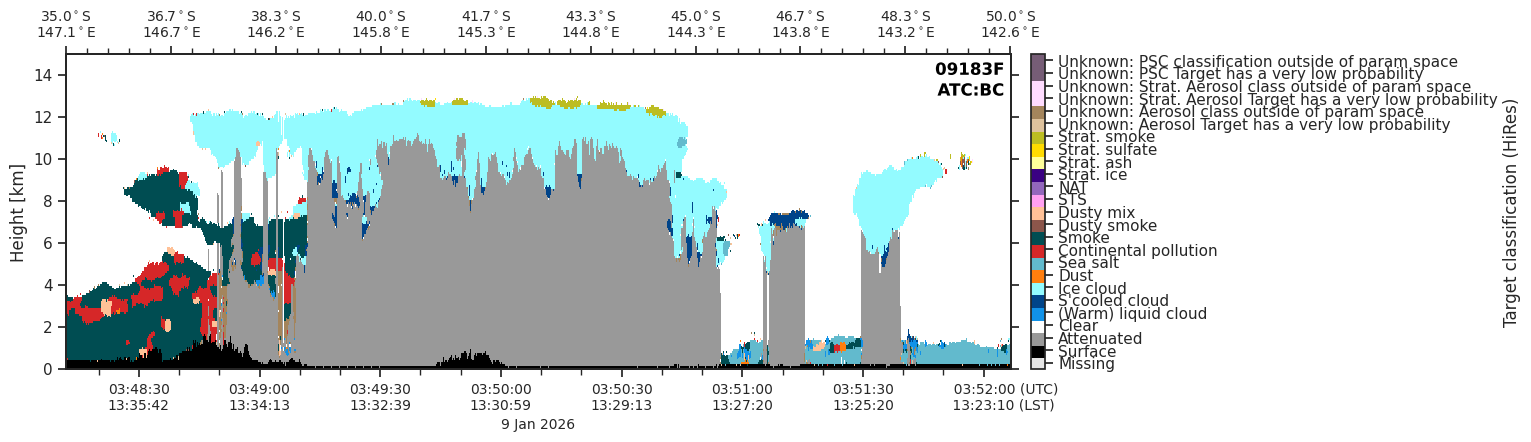

In [14]:

cfig = eck.CurtainFigure()
cfig = cfig.ecplot(
    ds_short,
    var='classification',
    height_range=(0, 15e3),  
)